# Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('C:\\Users\\Asus\\Desktop\\New folder\\kaggle\\train\\train.csv')

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [4]:
df.shape


(9800, 18)

# Data Cleaning

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df =df.drop(['Row ID','Ship Date','Customer ID','Customer Name','Country','Postal Code','Product ID'],axis = 1)

Droped the columns that are not going to be used in the analysis.

In [8]:
df.shape

(9800, 11)

In [9]:
df.rename(columns={'Order ID' : 'order_id','Order Date':'order_date','Ship Mode': 'ship_mode','Segment':'segment','City':'city','State':'state','Region':'region','Category':'category','Sub-Category':'sub_category','Product Name':'Product_name','Sales':'sales'},inplace=True)

In [10]:
df.head(2)

,order_id,order_date,ship_mode,segment,city,state,region,category,sub_category,Product_name,sales
0,CA-2017-152156,08/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,CA-2017-152156,08/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      9800 non-null   object 
 1   order_date    9800 non-null   object 
 2   ship_mode     9800 non-null   object 
 3   segment       9800 non-null   object 
 4   city          9800 non-null   object 
 5   state         9800 non-null   object 
 6   region        9800 non-null   object 
 7   category      9800 non-null   object 
 8   sub_category  9800 non-null   object 
 9   Product_name  9800 non-null   object 
 10  sales         9800 non-null   float64
dtypes: float64(1), object(10)
memory usage: 842.3+ KB


In [13]:
# Changing data type 
df['order_date']=pd.to_datetime(df['order_date'])

Extracting year and month from order_date column to new column 

In [14]:
df['order_year'] =df.order_date.dt.year

In [15]:
df['order_month']=df.order_date.dt.month_name()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9800 non-null   object        
 1   order_date    9800 non-null   datetime64[ns]
 2   ship_mode     9800 non-null   object        
 3   segment       9800 non-null   object        
 4   city          9800 non-null   object        
 5   state         9800 non-null   object        
 6   region        9800 non-null   object        
 7   category      9800 non-null   object        
 8   sub_category  9800 non-null   object        
 9   Product_name  9800 non-null   object        
 10  sales         9800 non-null   float64       
 11  order_year    9800 non-null   int64         
 12  order_month   9800 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 995.4+ KB


In [17]:
df.duplicated().sum()

1

In [18]:
# Droping the duplicate value
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum()

order_id        0
order_date      0
ship_mode       0
segment         0
city            0
state           0
region          0
category        0
sub_category    0
Product_name    0
sales           0
order_year      0
order_month     0
dtype: int64

# Top 10 Cities in Sales

In [21]:
sale_cities=pd.DataFrame(df.groupby(df.city).sum()['sales']).reset_index()
city_sales=sale_cities.nlargest(10,['sales'])
city_sales.head(10)

,city,sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


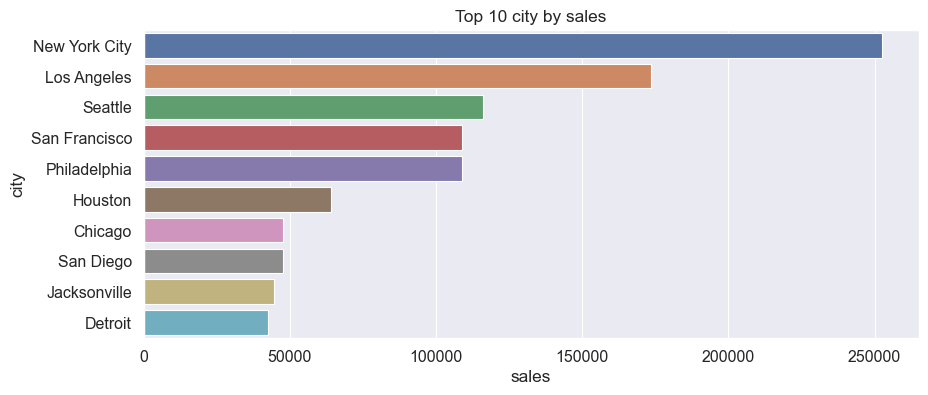

In [22]:
sns.set('paper',font_scale=1.3)
plt.figure(figsize=(10,4));
plt.title('Top 10 city by sales')
sns.set_style('darkgrid')
sns.barplot(x='sales', y='city',data = city_sales);

# Which segment generate sales the most ?

In [23]:
segment_sales = pd.DataFrame(df.groupby(df.segment).sum()['sales']).reset_index()
segment_sales=segment_sales.nlargest(5,['sales'])
segment_sales.head()

,segment,sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.247008e+05


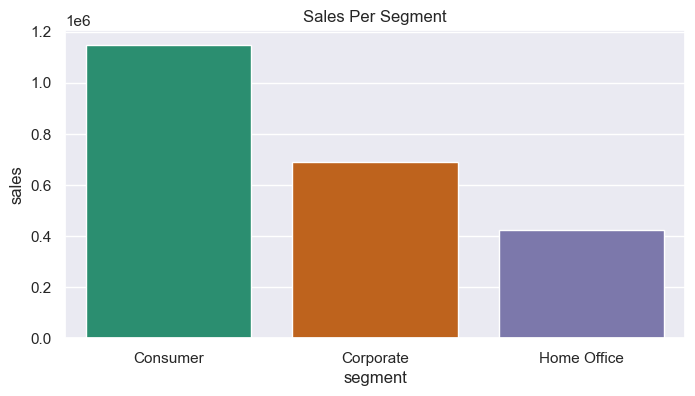

In [24]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
plt.figure(figsize=(8,4));
plt.title('Sales Per Segment')
sns.barplot(x='segment', y='sales',data = segment_sales,palette = 'Dark2');

# Which category generate the sales most ?

In [25]:
category_sales = pd.DataFrame(df.groupby(df['category']).sum()['sales']).reset_index()
category_sales = category_sales.nlargest(3, ['sales'])
category_sales.head()

,category,sales
2,Technology,827455.8730
0,Furniture,728377.2037
1,Office Supplies,705422.3340


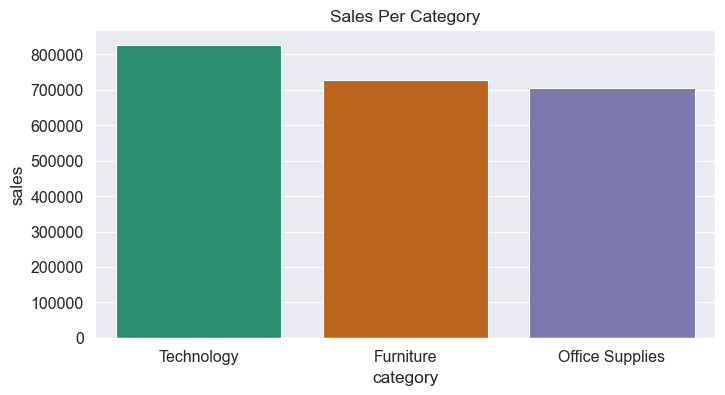

In [26]:
sns.set('paper',font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(8,4));
plt.title('Sales Per Category')
sns.barplot(x='category', y='sales',data = category_sales, palette = 'Dark2');

# which sub category generate sales the most ?

<AxesSubplot:title={'center':'Sub-Category by their Counts'}>

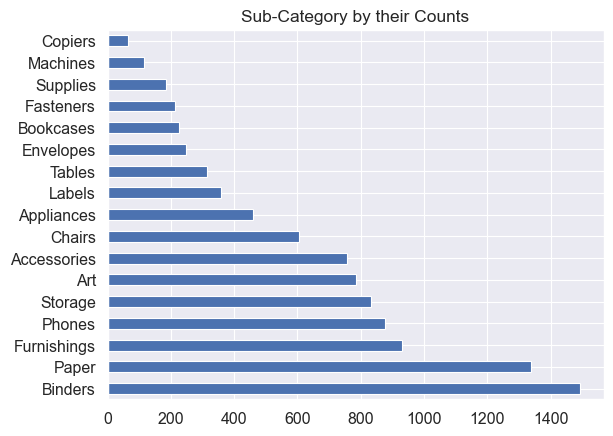

In [27]:
plt.title('Sub-Category by their Counts')
counts= df.sub_category.value_counts().plot(kind='barh')

counts

In [28]:
sub_category_sales = pd.DataFrame(df.groupby(df.sub_category).sum()['sales']).reset_index()
sub_category_sales = sub_category_sales.nlargest(10,['sales'])
sub_category_sales.head(10)

,sub_category,sales
13,Phones,327782.4480
5,Chairs,322541.3590
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


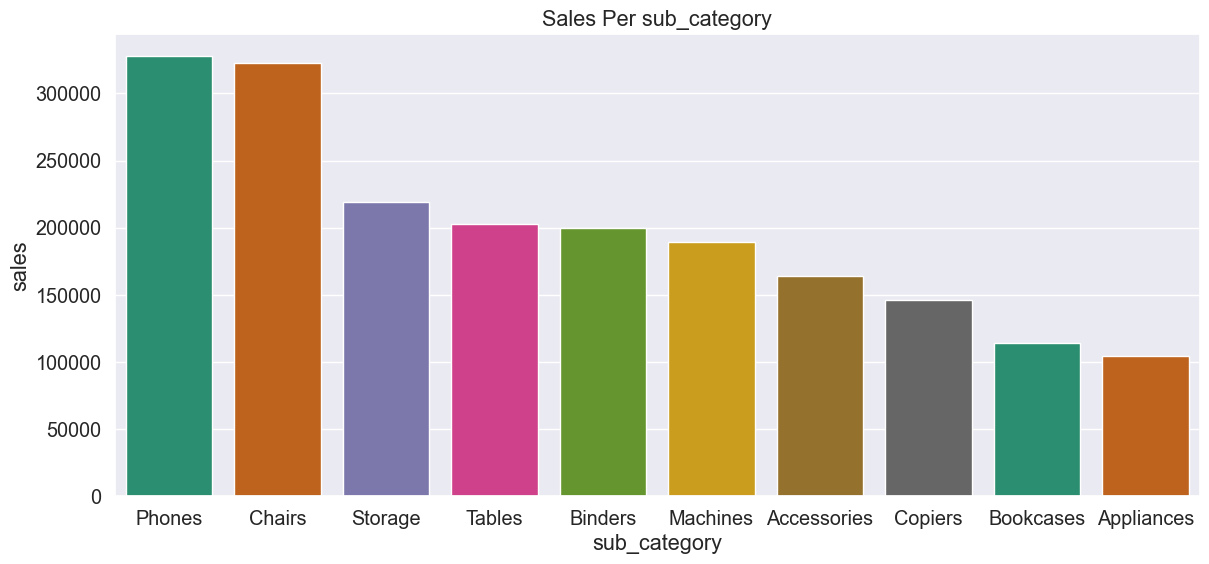

In [29]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(14,6));
plt.title('Sales Per sub_category')
sns.barplot(x='sub_category', y='sales',data = sub_category_sales, palette = 'Dark2');

# Which region generate sales the most ?

In [30]:
region_sales = pd.DataFrame(df.groupby(df.region).sum()['sales']).reset_index()
region_sales.head()

,region,sales
0,Central,492646.9132
1,East,669237.3540
2,South,389151.4590
3,West,710219.6845


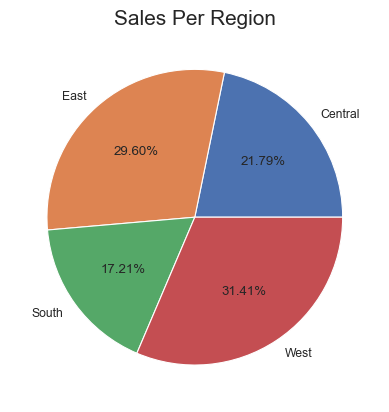

In [31]:
sns.set_context('paper')
plt.title('Sales Per Region',fontdict={'fontsize': 15})
label = ['Central','East','South','West']
plt.pie(region_sales['sales'],labels=label,autopct='%.2f%%' )
plt.show()

# Which ship mode generate sales the most ?

In [32]:
shipmode_sales = pd.DataFrame(df.groupby(df['ship_mode']).sum()['sales'].reset_index())
shipmode_sales = shipmode_sales.nlargest(4,'sales')
shipmode_sales.head(4)

,ship_mode,sales
3,Standard Class,1.340550e+06
2,Second Class,4.499142e+05
0,First Class,3.455723e+05
1,Same Day,1.252190e+05


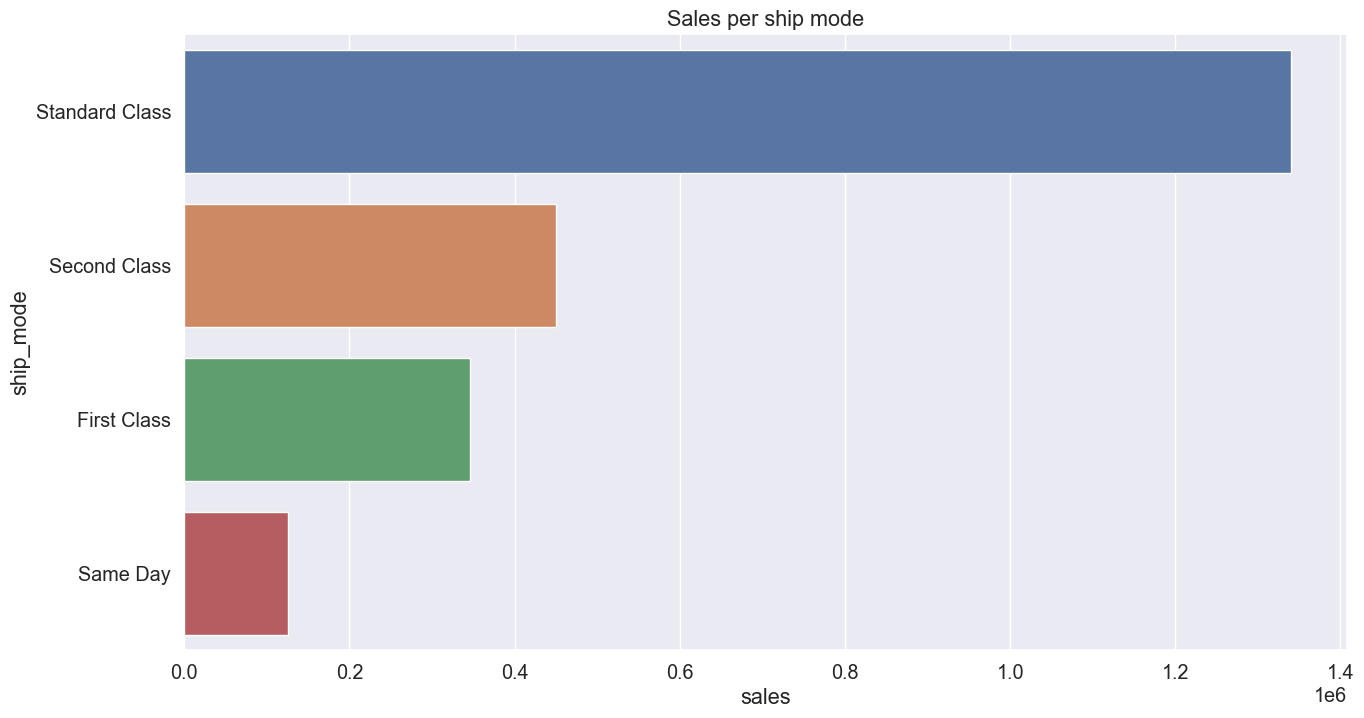

In [33]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Sales per ship mode')
sns.set_style('darkgrid')
sns.barplot(x='sales', y='ship_mode',data = shipmode_sales);

In [34]:
year_sales = pd.DataFrame(df.groupby(df['order_year']).sum()['sales'].reset_index())
year_sales = year_sales.nlargest(4,'sales')
year_sales.head(4)


,order_year,sales
3,2018,722052.0192
2,2017,600192.5500
0,2015,479574.8361
1,2016,459436.0054


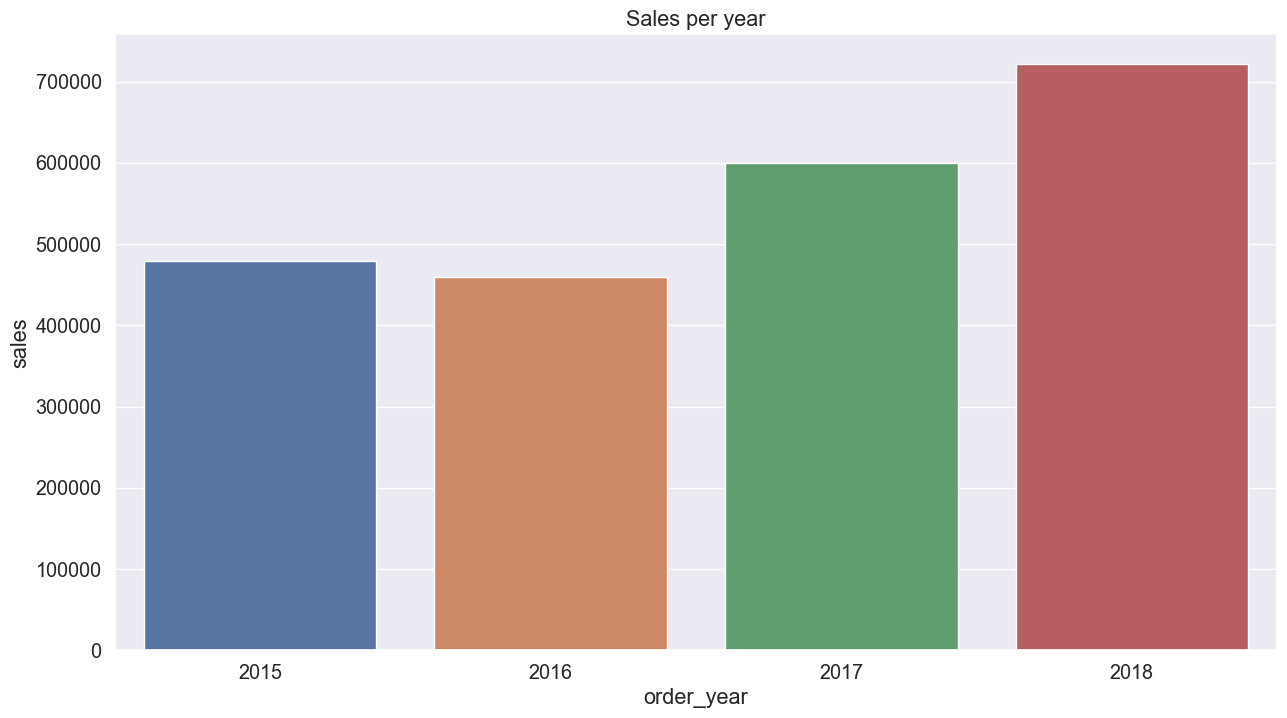

In [35]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Sales per year')
sns.set_style('darkgrid')
sns.barplot(x='order_year', y='sales',data = year_sales);

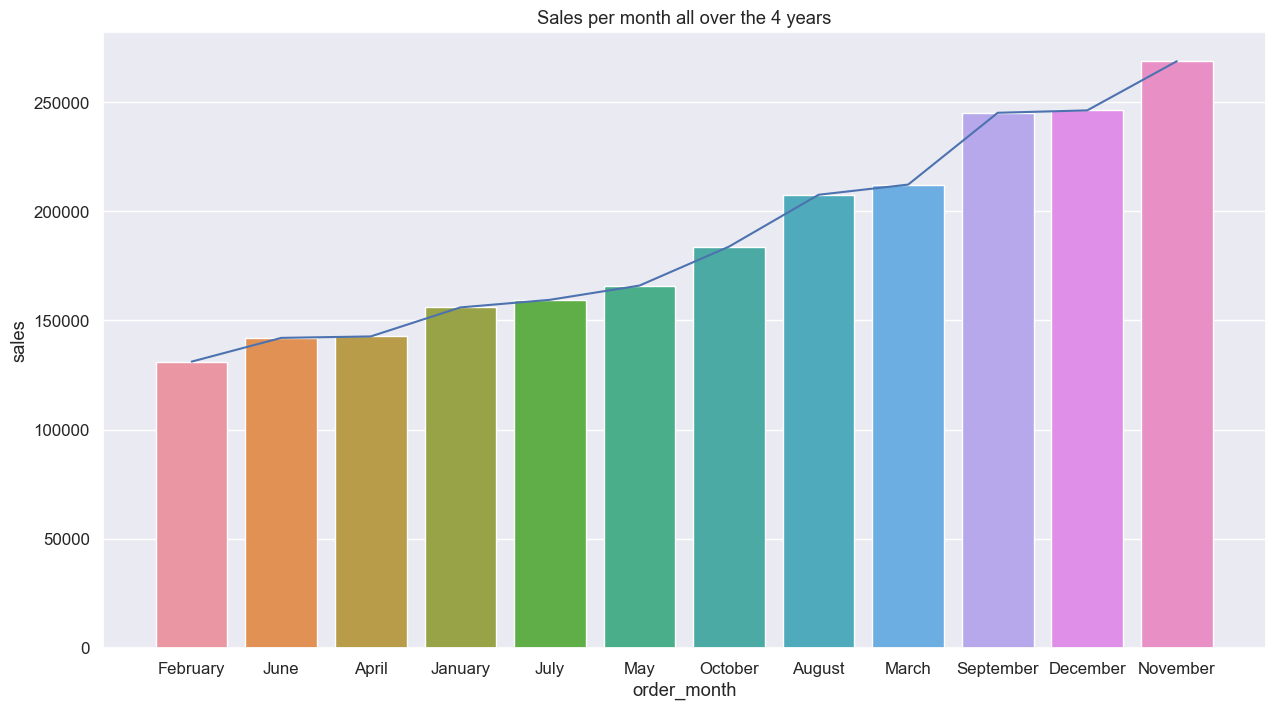

In [36]:
month_sales = pd.DataFrame(df.groupby(df['order_month']).sum()['sales'].reset_index())
month_sales.sort_values(by=['sales'],inplace=True)
sns.set(font_scale=1.1)
plt.figure(figsize=(15,8));
plt.title('Sales per month all over the 4 years')
sns.set_style('darkgrid')
sns.barplot(x='order_month', y='sales',data = month_sales);
sns.lineplot(x='order_month', y='sales',data = month_sales);

# Sample Insights 

1.New york [city] have the most sales <br> 
2.California [State] have the most sales <br> 
3.Standard Class was the most common ship mode (~ 60%).Most of the people don't care about fast shipping.<br> 			
4.Most orders was from consumers (~ 51%) <br> 
5.Technological products have the most sales <br> 
6.Most sales was from the West & East Region (~ 60%) <br> 
7.Top selling products are Phones and Chairs <br> 
8.Sale is increasing over time <br> 
9.We are getting more sales towards the end of the year